# Задача: определить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.
## Заказчик: коммерческий департамент

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as axs
from datetime import datetime as dt
import math
from matplotlib import transforms, pyplot as plt
from scipy import stats as st

%matplotlib inline
#%matplotlib

pd.options.display.float_format ='{:.5f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

Напишем функцию, которая позволит строить линейчатый график, как в книге Storytelling with data

In [31]:
def create_line (X, first_line, second_line, vertical_line, title, y_name,  first_line_name, second_line_name, result, year, data_source):
    
    # определяем цвета, которые будем использовать
    GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
    GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
    GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
    BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
    RED1, RED2 = '#C3514E', '#E6BAB7'
    GREEN1, GREEN2 = '#0C8040', '#9ABB59'
    ORANGE1 = '#F79747'
    
    # ставим шрифт
    plt.rcParams['font.family'] = 'Arial'
    
##################################################################################### 
    
    # настраиваем жирный и курсив
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    
##################################################################################### 

    
    # задаем лимит по оси у
    if (first_line.max() >= second_line.max()):
        ylim = int(first_line.max()*1.5)
    else:
        ylim = int(second_line.max()*1.5)
        
    # определяем значение разрыва
    if vertical_line:
        list_coof = []
        for i in range(len(X)):
            if (first_line[i] <= second_line[i]):
                list_coof.append(first_line[i] / second_line[i])
            else:
                list_coof.append(second_line[i] / first_line[i])
        max_value = max(list_coof)
        x_after_markers = list_coof.index(max_value) + 1
        result_x = x_after_markers
    else:
        x_after_markers = 1
        result_x = 4
    
    # отступ названия оси у по вертикали
    y_name_x = -1.2
    coef_title = 1.15
    max_value_line = first_line.append(second_line, ignore_index=True).max()
    while (max_value_line > 100):
            max_value_line = max_value_line / 10
            y_name_x = y_name_x*1.1
            coef_title *= 1.03
            
##################################################################################### 
    # внутренние функции
    
    # считаем положение отображения значений
    def annot_x (first_line, second_line):
        x1 = x2 = -3
        if len(str(first_line)) > 1:
            x1 = -3 - (len(str(first_line))*3)
        if len(str(second_line)) > 1:
            x2 = -3 - (len(str(second_line))*3)
        return x1, x2
    
    def annot_y (first_line, second_line):
        if (int(first_line) >= int(second_line)):
            y_an_1, y_an_2 = 16, -25.5
        else:
            y_an_1, y_an_2 = -25.5, 16
        return y_an_1, y_an_2

##################################################################################### 

    # создаём новую фигуру
    fig, ax1 = plt.subplots(figsize=(8.4, 6.2), dpi=110, linewidth=3, edgecolor='#636369')
    
    # задаём отступы
    fig.subplots_adjust(left=0.104, right=0.968, top=0.751, bottom=0.187)    

    # рисуем линии
    ax1.plot(range(12), first_line, linewidth=4, color=GRAY6)
    ax1.plot(range(12), second_line, linewidth=4, color=BLUE1)
    
    # рисуем маркеры
    ax1.scatter(range(12)[x_after_markers:], first_line[x_after_markers:], s=90, color=GRAY6, clip_on=False)
    ax1.scatter(range(12)[x_after_markers:], second_line[x_after_markers:], s=90, color=BLUE1, clip_on=False)

    # добавляем значения около точек    
    for i in range(x_after_markers, len(X)):
        x_an_1, x_an_2 = annot_x(first_line[i], second_line[i])
        y_an_1, y_an_2 = annot_y(first_line[i], second_line[i]) 
        
        ax1.annotate(first_line[i], (i, first_line[i]), xytext=(x_an_1, y_an_1), textcoords='offset points',
                     color=GRAY6, fontsize=15)
        ax1.annotate(second_line[i], (i, second_line[i]), xytext=(x_an_2, y_an_2), textcoords='offset points',
                     color=BLUE1, fontsize=15)

    # настраиваем лимиты осей
    ax1.set_xlim([0, 11])
    ax1.set_ylim([0, ylim])

    # настраиваем лимиты тиков по х и у и подставляем отображаемые значения по х
    plt.setp(ax1,
             xticks=list(range(12)),
             xticklabels=X,
             yticks=list(range(0, int(ylim*1.1), int(ylim*0.1))))

    # настраиваем отображение значений по осям
    for i in ax1.get_yticklabels() + ax1.get_xticklabels():
        i.set_fontsize(14)
        i.set_color(GRAY4)
    
    # меняем цвета осей и тиков
    ax1.tick_params(color=GRAY4)
    ax1.spines['bottom'].set_color(GRAY4)
    ax1.spines['left'].set_color(GRAY4)

    # убираем границы графика
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    # добавляем линию разделения по x
    plt.axvline(x=x_after_markers-1, ymax=0.8, color='#636369', linewidth=1)
    
#     # добавляем несколько разделений по x
#     plt.vlines(x=[1,2,3], ymin = 0, ymax=ylim*0.8, color=GRAY1)
    
#     # добавляем линию разделения по у
#     plt.axhline(y=30, xmax=0.9,color=BLUE4, linewidth=3)

    # добавляем название линий
    ax1.text((len(X)-0.5), first_line[len(X) - 1]*0.95, first_line_name, fontsize='21', color=GRAY6)
    ax1.text((len(X)-0.5), second_line[len(X) - 1]*0.95, second_line_name, fontsize='21', color=BLUE1)

    #  добавляем название графика
    fig.text(0.04, 0.82, title, fontsize=19, color=GRAY4)
    
    #  добавляем название оси у
    ax1.set_ylabel(y_name, fontsize=14, rotation='vertical', color=GRAY4, loc='top', labelpad=6)
    
    # добавляем вывод на график
    fig.text(result_x*0.1*0.9, 0.666, result, fontsize=14, color=GRAY5, linespacing=1.4)

    # добавляем описание источника данных
    fig.text(0.04, 0.03, data_source, fontsize=12.5, color=GRAY3, linespacing=1.3);
    
    # добавляем год
    fig.text(0.08, 0.11, year, fontsize=14, color=GRAY4)
    
#     fig.set(facecolor=BLUE4)
    plt.show()

In [33]:
def create_hist(df_all, tariff, tar_lists, line_name, tar_limits, color):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,18), linewidth=3, edgecolor='#636369')
    fig.text(0.3, 0.91, line_name, fontsize=36, color=color)
    
    
    
    for i in range(3):
        temp = df_all.loc[df_all['tariff'] == tariff][tar_lists[i]]
        distr = st.norm(temp.mean(), temp.std()) 
        result = distr.cdf(tar_limits[i])
        axes[i].hist(temp, color=color, bins=50)
        ylim = axes[i].get_ylim()
        xlim = axes[i].get_xlim()
        axes[i].text(x=0, y=0, position=(xlim[1]*0.55, ylim[1]*0.91), s=tar_lists[i], fontsize=24)
        axes[i].tick_params(color='#636369')
        axes[i].spines['bottom'].set_color('#636369')
        axes[i].spines['left'].set_color('#636369')
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].vlines(x=[tar_limits[i], temp.std(), temp.mean()], ymin=0, ymax=(ylim[1]*0.73, ylim[1]*0.67, ylim[1]*0.59), colors=['k', 'r', 'g'], linewidth=2)
        axes[i].text(x=0, y=0, position=(tar_limits[i], ylim[1]*0.74), s='limit', fontsize=20, ha='right', color='k')
        axes[i].text(x=0, y=0, position=(xlim[1]*0.55, ylim[1]*0.81), s='Вероятность превысить лимит: {:.2%}'.format((1 - result)), fontsize=20, color=color)
        axes[i].text(x=0, y=0, position=(temp.std(), ylim[1]*0.68), s='std', fontsize=20, ha='right', color='r')
        axes[i].text(x=0, y=0, position=(temp.mean(), ylim[1]*0.60), s='mean', fontsize=20, ha='right', color='g')
        for j in (axes[i].get_yticklabels() + axes[i].get_xticklabels()):
            j.set_fontsize(20)
            j.set_color('#636369')

    return plt.show();

In [34]:
try: 
    df_cal = pd.read_csv('/datasets/calls.csv')
    df_int = pd.read_csv('/datasets/internet.csv')
    df_mes = pd.read_csv('/datasets/messages.csv')
    df_tar = pd.read_csv('/datasets/tariffs.csv')
    df_user = pd.read_csv('/datasets/users.csv')
except:
    df_cal = pd.read_csv('calls.csv')
    df_int = pd.read_csv('internet.csv')
    df_mes = pd.read_csv('messages.csv')
    df_tar = pd.read_csv('tariffs.csv')
    df_user = pd.read_csv('users.csv')

<b>Входные данные: </b> данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

<b>Описание тарифов:</b>

1. Тариф «Смарт»
    - <b>Ежемесячная плата: </b> 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 3 рубля
        - сообщение: 3 рубля
        - 1 Гб интернет-трафика: 200 рублей
        

2. Тариф «Ультра»
    - <b>Ежемесячная плата: </b> 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора:: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div class="alert alert-block alert-info">
<b>Примечание:</b> «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся. 
</div>

In [35]:
display(df_cal)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00000,1000
1,1000_1,2018-08-17,0.00000,1000
2,1000_2,2018-06-11,2.85000,1000
3,1000_3,2018-09-21,13.80000,1000
4,1000_4,2018-12-15,5.18000,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76000,1499
202603,1499_216,2018-10-18,18.83000,1499
202604,1499_217,2018-11-10,10.81000,1499
202605,1499_218,2018-10-06,4.27000,1499


In [36]:
display(df_int.info())
df_int.drop('Unnamed: 0', axis=1 ,inplace=True)
display(df_int.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


None

In [37]:
display(df_mes)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [38]:
display(df_tar)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [39]:
display(df_user)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [40]:
display(df_user.groupby(by=['tariff','city']).count().sort_values('user_id', ascending=False))

user_id  age  churn_date  first_name  last_name  \
tariff city                                                               
smart  Москва                67   67           6          67         67   
ultra  Москва                32   32           3          32         32   
smart  Санкт-Петербург       30   30           2          30         30   
       Казань                13   13           0          13         13   
       Новосибирск           11   11           0          11         11   
...                         ...  ...         ...         ...        ...   
ultra  Иваново                1    1           0           1          1   
       Казань                 1    1           0           1          1   
       Кемерово               1    1           0           1          1   
       Магнитогорск           1    1           0           1          1   
       Ярославль              1    1           0           1          1   

                        reg_date  
tariff city                       
smart  Москва                 67  
ultra  Москва                 32  
smart  Санкт-Петербург        30  
       Казань                 13  
       Новосибирск            11  
...                          ...  
ultra  Иваново                 1  
       Казань                  1  
       Кемерово                1  
       Магнитогорск            1  
       Ярославль               1  

[129 rows x 6 columns]

In [41]:
def nan_in_percent(df):
    na_count = df.isna().sum()
    na_percent = round(df.isna().sum() / len(df) * 100, 2)
    na_df = pd.DataFrame({'na_count': na_count,
                         '%': na_percent})
    return na_df

nan_in_percent(df_user)
# df_cal df_int df_mes df_tar df_user 2018-10-25

,na_count,%
user_id,0,0.00000
age,0,0.00000
churn_date,462,92.40000
city,0,0.00000
first_name,0,0.00000
last_name,0,0.00000
reg_date,0,0.00000
tariff,0,0.00000


### Посмотрели данные, теперь подготовка данных
- [x] 1) Убрать столбец unnamed в таблице internet, так как он дублирует индекс.<br>
- [x] 2) Приведём во всех таблицах даты к типу datetime. <br>
- [x] 3) Проверить пропуски (значимых нет).
- [x] 4) Посчитать количество сделанных звонком и израсходованных минут по месяцам дял каждого пользователя.
- [x] 5) Посчитать количество отправленных собщений по месяцам.
- [x] 6) Посчитать объем израсходованного интернет-трафика по месяцам.
- [x] 7) Посчитать помесячную выручку с каждого пользователя.

In [42]:
# приводим все даты к типу datetime
df_user['churn_date'] = pd.to_datetime(df_user['churn_date'],format='%Y-%m-%d')
df_user['reg_date'] = pd.to_datetime(df_user['reg_date'],format='%Y-%m-%d')
df_mes['message_date'] = pd.to_datetime(df_mes['message_date'],format='%Y-%m-%d')
df_cal['call_date'] = pd.to_datetime(df_cal['call_date'],format='%Y-%m-%d')
df_int['session_date'] = pd.to_datetime(df_int['session_date'],format='%Y-%m-%d')

In [43]:
# создаем столбец с обозначением месяца в столбцах (кроме тарифов)
df_cal['month'] = df_cal['call_date'].dt.month
df_int['month'] = df_int['session_date'].dt.month
df_mes['month'] = df_mes['message_date'].dt.month
# округляем количество минут в большую сторону
df_cal['duration'] = np.ceil(df_cal['duration'])
# создаём пивот с количеством отвеченных звонков, количеством сообщений, объемом израсходованного интернет трафика по месяцам
df_cal_month_count = pd.pivot_table(df_cal.loc[df_cal['duration'] > 0], values=['duration'], index=['user_id', 'month'], aggfunc='count')
df_cal_month_sum = pd.pivot_table(df_cal.loc[df_cal['duration'] > 0], values=['duration'], index=['user_id', 'month'], aggfunc='sum')
df_mes_count = pd.pivot_table(df_mes, values='id', index=['user_id','month'], aggfunc='count')
df_int_sum = pd.pivot_table(df_int.loc[df_int['mb_used'] > 0], values='mb_used', index=['user_id','month'], aggfunc='sum')
df_user_tar = pd.pivot_table(df_user, values='tariff', index='user_id', aggfunc='sum')
# округляем мегабайты до гигабайтов в большую сторону
#df_int_sum['mb_used'] = np.ceil(df_int_sum['mb_used'] / 1000)


In [44]:
# совмещаем таблицы количества сообщений, звонков, интернет-трафика и продолжительности звонка
df_all = df_mes_count.merge(df_int_sum, on=['user_id', 'month'], how='outer')
df_all = df_all.merge(df_cal_month_count, on=['user_id', 'month'], how='outer')
df_all = df_all.merge(df_cal_month_sum, on=['user_id', 'month'], how='outer')
# заполняем пустые значния 0-ми 
df_all.fillna(0, inplace=True)
# сортируем
df_all.sort_values(by='user_id',inplace=True)
# перименовываем столбцы
df_all = df_all.rename(columns={'id':'messages','mb_used':'mb_used','duration_x': 'calls(count)', 'duration_y': 'calls(duration)'})
# переводим индекс месяца в столбец
df_all.reset_index(level=1, inplace=True)
# добавляем значения тарифа
df_all = df_all.merge(df_user_tar, on='user_id',how='inner')
# переводим в таблицу с обычным индексом
df_all.reset_index(level=0, inplace=True)
#df_all
# поиск нужного id
# display(df_all.query('user_id == [1000]'))

In [45]:
# создаём переменные для функции
mes_columns = ['mes_not_used','mes_used','cost_mes']
mes_tar_ultra = [df_tar.loc[1, 'messages_included'], df_tar.loc[1, 'rub_per_message'], 'messages', 1]
mes_tar_smart = [df_tar.loc[0, 'messages_included'], df_tar.loc[0, 'rub_per_message'], 'messages', 1]

int_columns = ['mb_not_used','gb_used','cost_int']
int_tar_ultra = [df_tar.loc[1, 'mb_per_month_included'], df_tar.loc[1, 'rub_per_gb'], 'mb_used', 1000]
int_tar_smart = [df_tar.loc[0, 'mb_per_month_included'], df_tar.loc[0, 'rub_per_gb'], 'mb_used', 1000]

cal_columns = ['cal_not_used','cal_used','cost_cal']
cal_tar_ultra = [df_tar.loc[1, 'minutes_included'], df_tar.loc[1, 'rub_per_minute'], 'calls(duration)', 1]
cal_tar_smart = [df_tar.loc[0, 'minutes_included'], df_tar.loc[0, 'rub_per_minute'], 'calls(duration)', 1]

In [46]:
# создаём функции для автоматического подсчета стоимости
def cost(df_all, tar_columns, list_tar, i):
    df_all.at[i, tar_columns[0]] = list_tar[0] - df_all.loc[i, list_tar[2]]
    if (df_all.loc[i, tar_columns[0]] >= 0):
        df_all.at[i, tar_columns[1]] = 0
        df_all.at[i, tar_columns[2]] = 0
    else:
        df_all.at[i, tar_columns[1]] = np.ceil(abs(df_all.loc[i, tar_columns[0]]) / list_tar[3])
        df_all.at[i, tar_columns[2]] = df_all.at[i, tar_columns[1]] * list_tar[1]

In [47]:
# считаем стоимости по категориям и общую
for i in range(len(df_all)):
    if (df_all.loc[i, 'tariff'] == 'ultra'): 
        cost(df_all, mes_columns, mes_tar_ultra, i)
        cost(df_all, int_columns, int_tar_ultra, i)
        cost(df_all, cal_columns, cal_tar_ultra, i)
        df_all.at[i, 'all_cost'] = 1950 + df_all.at[i, 'cost_mes'] + df_all.at[i, 'cost_cal'] + df_all.at[i, 'cost_int']
    else:
        cost(df_all, mes_columns, mes_tar_smart, i)
        cost(df_all, int_columns, int_tar_smart, i)
        cost(df_all, cal_columns, cal_tar_smart, i)
        df_all.at[i, 'all_cost'] = 550 + df_all.at[i, 'cost_mes'] + df_all.at[i, 'cost_cal'] + df_all.at[i, 'cost_int']

In [48]:
df_all

,user_id,month,messages,mb_used,calls(count),calls(duration),tariff,mes_not_used,mes_used,cost_mes,mb_not_used,gb_used,cost_int,cal_not_used,cal_used,cost_cal,all_cost
0,1000,5,22.00000,2253.49000,17.00000,159.00000,ultra,978.00000,0.00000,0.00000,28466.51000,0.00000,0.00000,2841.00000,0.00000,0.00000,1950.00000
1,1000,6,60.00000,23233.77000,28.00000,172.00000,ultra,940.00000,0.00000,0.00000,7486.23000,0.00000,0.00000,2828.00000,0.00000,0.00000,1950.00000
2,1000,7,75.00000,14003.64000,41.00000,340.00000,ultra,925.00000,0.00000,0.00000,16716.36000,0.00000,0.00000,2660.00000,0.00000,0.00000,1950.00000
3,1000,8,81.00000,14055.93000,42.00000,408.00000,ultra,919.00000,0.00000,0.00000,16664.07000,0.00000,0.00000,2592.00000,0.00000,0.00000,1950.00000
4,1000,9,57.00000,14568.91000,46.00000,466.00000,ultra,943.00000,0.00000,0.00000,16151.09000,0.00000,0.00000,2534.00000,0.00000,0.00000,1950.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,9,44.00000,22134.41000,53.00000,471.00000,smart,6.00000,0.00000,0.00000,-6774.41000,7.00000,1400.00000,29.00000,0.00000,0.00000,1950.00000
3210,1499,9,11.00000,1845.75000,8.00000,70.00000,smart,39.00000,0.00000,0.00000,13514.25000,0.00000,0.00000,430.00000,0.00000,0.00000,550.00000
3211,1499,10,48.00000,17788.51000,44.00000,449.00000,smart,2.00000,0.00000,0.00000,-2428.51000,3.00000,600.00000,51.00000,0.00000,0.00000,1150.00000
3212,1499,11,59.00000,17963.31000,62.00000,612.00000,smart,-9.00000,9.00000,27.00000,-2603.31000,3.00000,600.00000,-112.00000,112.00000,336.00000,1513.00000


## Анализ данных
### Посмотрели данные, теперь подготовка данных
- [x] 1) Посчитать среднее количество, дисперсию, стандартное отклонение требуемых минут для каждого пользователя в месяц.
- [x] 2) Посчитать среднее количество, дисперсию, стандартное отклонение требуемых сообщений для каждого пользователя в месяц.
- [x] 3) Посчитать среднее количество, дисперсию, стандартное отклонение требуемых интернет-трафика для каждого пользователя в месяц.
- [x] 4) Построить гистограмы.
- [x] 5) Описать распределения.

In [49]:
smart = pd.DataFrame(df_all[df_all['tariff'] == 'smart'], columns=['month','calls(duration)','messages','mb_used','all_cost'])
ultra = pd.DataFrame(df_all[df_all['tariff'] == 'ultra'], columns=['month','calls(duration)','messages','mb_used','all_cost'])
display(smart.groupby(['month']).agg(['mean', 'var', 'std', 'count']).T)
display(ultra.groupby(['month']).agg(['mean', 'var', 'std', 'count']))


month                             1              2              3   \
calls(duration) mean       203.85294      298.68966      390.05195   
                var      23787.34135    36412.28796    36823.15516   
                std        154.23145      190.82004      191.89360   
                count       34.00000       58.00000       77.00000   
messages        mean        18.23529       24.08621       31.85714   
                var        262.36720      473.09770      718.49248   
                std         16.19775       21.75081       26.80471   
                count       34.00000       58.00000       77.00000   
mb_used         mean      8513.71765    11597.05431    15104.15909   
                var   41533913.37108 39029429.91706 33968352.79335   
                std       6444.68101     6247.35383     5828.23754   
                count       34.00000       58.00000       77.00000   
all_cost        mean       727.20588      831.05172     1175.01299   
                var     211009.92602   311324.78675   506716.53930   
                std        459.35817      557.96486      711.84025   
                count       34.00000       58.00000       77.00000   

month                             4              5              6   \
calls(duration) mean       367.13393      387.36170      395.64024   
                var      34778.20713    34820.06109    30742.91886   
                std        186.48916      186.60134      175.33659   
                count      112.00000      141.00000      164.00000   
messages        mean        30.74107       33.77305       33.40244   
                var        602.13956      730.99098      806.80637   
                std         24.53853       27.03684       28.40434   
                count      112.00000      141.00000      164.00000   
mb_used         mean     13462.18062    15805.18433    15794.64799   
                var   32470042.71669 35739254.55673 33537483.02490   
                std       5698.24909     5978.23172     5791.15559   
                count      112.00000      141.00000      164.00000   
all_cost        mean       968.44643     1213.11348     1218.65244   
                var     326192.93404   552086.08703   579690.75576   
                std        571.13303      743.02496      761.37425   
                count      112.00000      141.00000      164.00000   

month                             7              8              9   \
calls(duration) mean       408.35323      421.46809      428.61154   
                var      32250.26960    34793.58338    33535.34272   
                std        179.58360      186.53038      183.12658   
                count      201.00000      235.00000      260.00000   
messages        mean        33.75124       33.63830       33.63846   
                var        799.88781      838.25750      790.61782   
                std         28.28229       28.95268       28.11793   
                count      201.00000      235.00000      260.00000   
mb_used         mean     15743.15035    16610.72009    16303.57881   
                var   34776430.55420 31287232.54614 26999618.87886   
                std       5897.15445     5593.49913     5196.11575   
                count      201.00000      235.00000      260.00000   
all_cost        mean      1242.85572     1333.36170     1263.79231   
                var     581058.93408   641973.76177   556440.38913   
                std        762.27222      801.23265      745.94932   
                count      201.00000      235.00000      260.00000   

month                             10             11             12  
calls(duration) mean       426.13605      435.26582      478.56083  
                var      35392.33637    31605.23705    39698.62203  
                std        188.12851      177.77862      199.24513  
                count      294.00000      316.00000      337.00000  
messages        mean        33.76531       34.07595       35.99407  
             

calls(duration)                              messages             \
                 mean          var       std count     mean        var   
month                                                                    
1           428.11111  72769.36111 269.75797     9 33.77778  940.69444   
2           297.12500  87919.67935 296.51253    24 21.95833  716.82428   
3           489.64865 111384.90090 333.74377    37 32.29730 1732.38138   
4           458.01818  71653.87003 267.68241    55 31.56364 1407.28754   
5           510.32836  83870.19358 289.60351    67 37.85075 1624.64405   
6           479.70238  91535.94650 302.54908    84 41.72619 1986.29762   
7           545.79121  94322.27814 307.11932    91 49.84615 2372.04274   
8           510.77570  97956.49639 312.98003   107 48.43925 2171.73920   
9           539.44348 105716.77529 325.14116   115 52.28696 2152.85553   
10          558.08130 106464.58350 326.28911   123 58.43089 2697.18166   
11          541.38060  96570.05706 310.75723   134 55.79104 2476.94849   
12          592.80576 117276.33156 342.45632   139 60.61151 2681.97842   

                         mb_used                                     all_cost  \
           std count        mean             var         std count       mean   
month                                                                           
1     30.67074     9 13140.68111  47132987.72009  6865.34688     9 1950.00000   
2     26.77357    24 11775.93750 113308443.98932 10644.64391    24 1975.00000   
3     41.62189    37 17535.55027 119941614.06243 10951.78588    37 2014.86486   
4     37.51383    55 16828.13436  94452154.81684  9718.64985    55 2001.81818   
5     40.30687    67 19363.15299 100924330.42699 10046.11021    67 2064.17910   
6     44.56790    84 18924.93929  86357572.13234  9292.87749    84 2041.07143   
7     48.70362    91 20495.66516 101308192.04039 10065.19707    91 2124.72527   
8     46.60192   107 19576.05467 109758234.22949 10476.55641   107 2083.17757   
9     46.39887   115 19204.27713  89985870.90188  9486.08828   115 2024.34783   
10    51.93440   123 20045.33732  96100999.85249  9803.11174   123 2069.51220   
11    49.76895   134 19786.81246  98158937.70444  9907.51925   134 2094.40299   
12    51.78782   139 21793.17259 107710907.32320 10378.38655   139 2142.08633   

                                    
               var       std count  
month                               
1          0.00000   0.00000     9  
2       7173.91304  84.69896    24  
3      43175.67568 207.78757    37  
4      38515.15152 196.25277    55  
5     179379.24016 423.53186    67  
6     104648.23580 323.49380    84  
7     211131.86813 459.49088    91  
8     159761.50591 399.70177   107  
9      60937.07094 246.85435   115  
10    162280.08796 402.84003   123  
11    172694.00180 415.56468   134  
12    242944.16641 492.89367   139

In [50]:
# const
agg_list = ['mean', 'var', 'std']
tar_lists = ['messages','calls(duration)','mb_used', 'all_cost']
smart_mes_mean = smart.groupby(['month']).agg(agg_list)
smart_mes_mean['mb_used'] /= 1000
ultra_mes_mean = ultra.groupby(['month']).agg(agg_list)
ultra_mes_mean['mb_used'] /= 1000
months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
first_line_name = 'Ultra'
second_line_name = 'Smart'
year = 2018
data_source_text = ['1000 сообщений', '3000 минут', '30.7 гигабайт', '9.85%', '50 сообщений', '500 минут', '15.3 гигабайт', '119.35%']


# изменяемые данные
titles = (['Среднее количество сообщений',
         'Средняя продолжительность звонков',
         'Среднее количество трафика',
          'Средняя стоимость тарифов'])
y_names = (['Количество сообщений', 'Продолжительность звонков', 'Трафик (ГБ)', 'Стоимость'])
results = (['Количество сообщений, $\\bf{намного\ меньше\ }$лимита сообщений\n'
            'на месяц по обоим тарифам, из чего можно сделать вывод:\n'
            '$\\bf{Пакет\ сообщений\ не\ будет\ влиять\ на\ выручку\ с\ тарифов.}$',
            
            'Пользователи тарифа Smart приближаются к $\\it{лимитным\ значениям}$,\n'
            'из чего можно сделать вывод:\n'
            'Есть $\\bf{тенденция\ к\ росту\ выручки\ }$по тарифу $\\bf{Smart}$',
            
            'Пользователи $\\bf{Smart\ превышают\ лимит\ мегабайт}$\n'
            'практически каждый месяц, из чего следует вывод:\n'
            '$\\bf{Smart\ каждый\ месяц\ приносит\ дополнительную\ прибыль}$',
            
            'Средняя выручка с $\\bf{Ultra\ -\ выше\ и\ стабильнее}$, чем у Smart.\n'
            'У $\\bf{Smart}$ можем наблюдать $\\bf{тенденции\ к\ росту}$ значений.\n'
            'Выручка со $\\bf{Smart\ растёт\ быстрее\ примерно\ в\ 12\ раз.}$'])



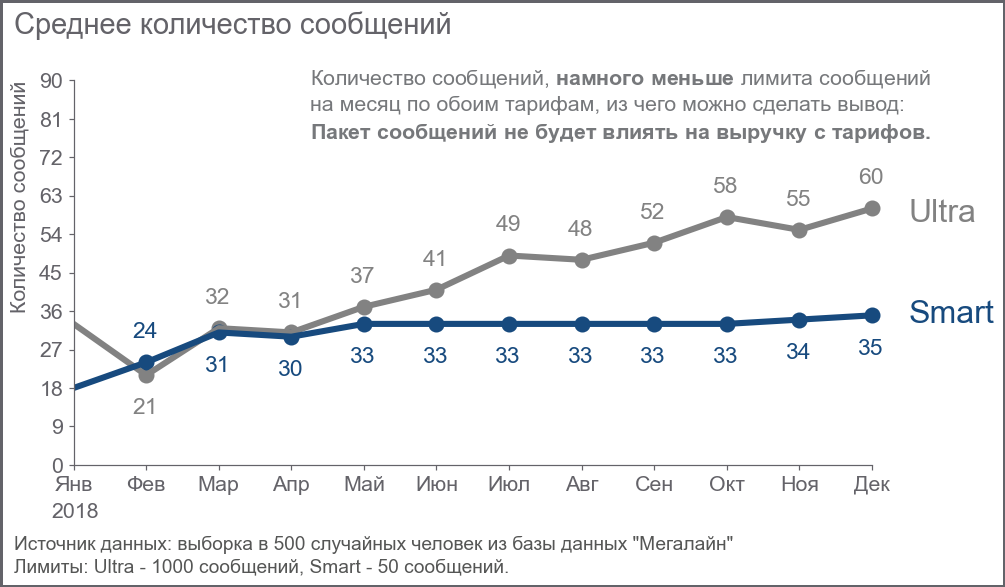

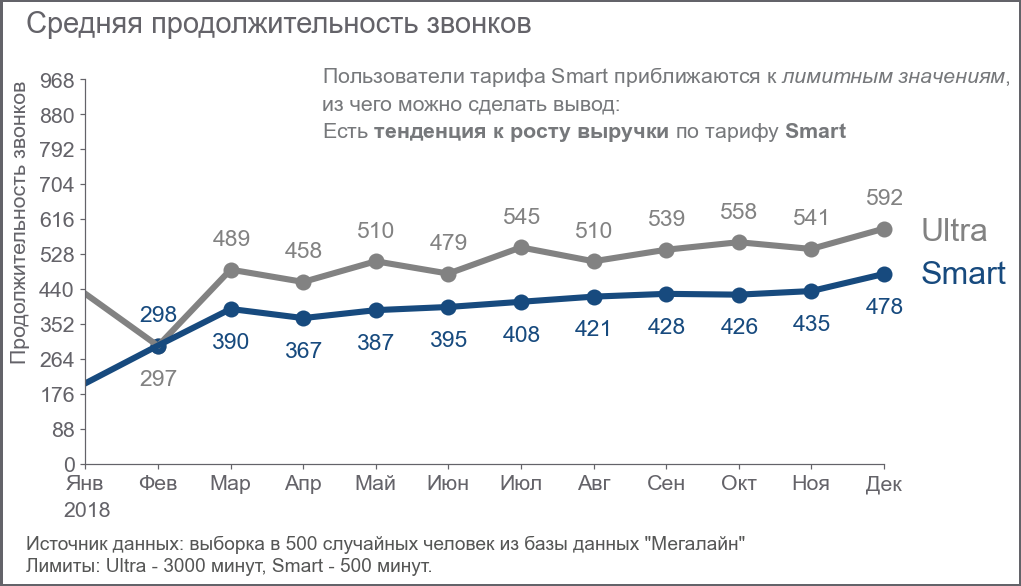

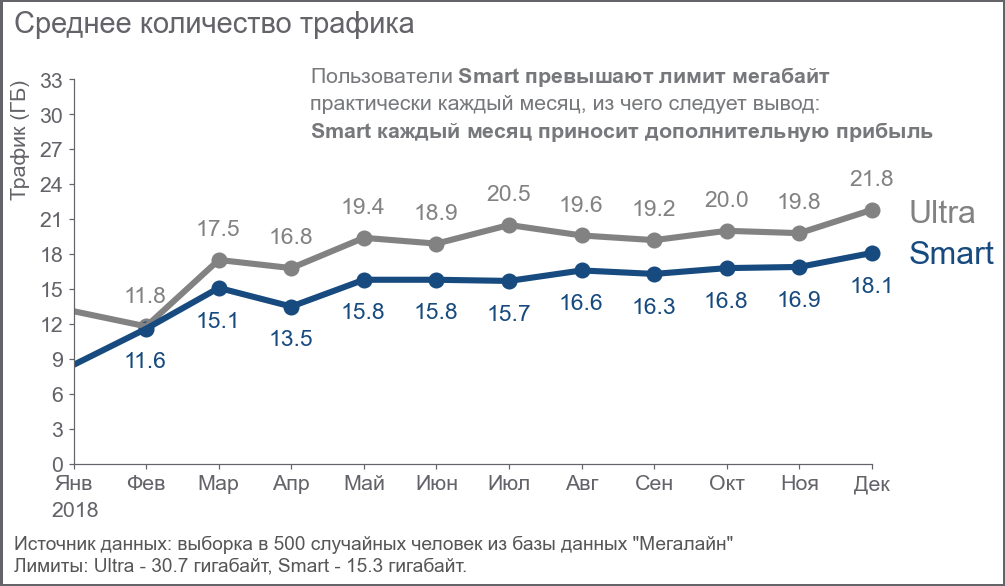

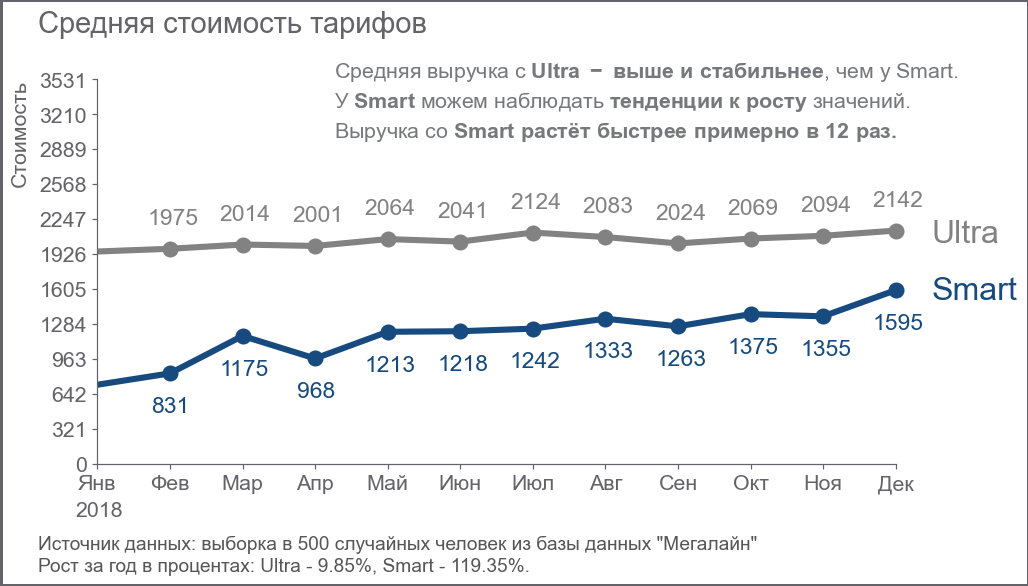

In [51]:
# смотрим графики сообщений, продолжительности звонков и интернет-трафика
for i in range(4):
    data_source = ('Источник данных: выборка в 500 случайных человек из базы данных "Мегалайн"\n'
                   f'Лимиты: Ultra - {data_source_text[i]}, Smart - {data_source_text[i+(int(len(data_source_text)/2))]}.')
    if i == 3:
        data_source = ('Источник данных: выборка в 500 случайных человек из базы данных "Мегалайн"\n'
               f'Рост за год в процентах: Ultra - {data_source_text[i]}, Smart - {data_source_text[i+(int(len(data_source_text)/2))]}.')
    n = 'int'
    m = 0
    if i == 2:
        n = 'float'
        m = 1
        delim = '' 
    line_smart_mes_mean = smart_mes_mean[tar_lists[i], agg_list[0]].astype(n).round(m)
    line_smart_mes_mean.reset_index(drop=True, inplace=True)
    line_ultra_mes_mean = ultra_mes_mean[tar_lists[i], agg_list[0]].astype(n).round(m)
    line_ultra_mes_mean.reset_index(drop=True, inplace=True)
    
    create_line(months, line_ultra_mes_mean, line_smart_mes_mean, False, titles[i], y_names[i], first_line_name, second_line_name, results[i], year, data_source)

### Вывод
По графикам сравнения видно, что:<br>
    1) Сообщениями пользуются крайне мало пользователи обоих тарифов.<br>
    <br>2) Звонки:<br>
        а) Звонками пользоватали тарифа Ultra пользуются чаще, чем Smart, однако, в среднем до лимитных значений не доходит ни у одного из тарифов.<br>
        б)  Пользователи тарифа Smart всё чаще превышают лимит, из чего можно сделать вывод, звонки по тарифу Smart приносят дополнительную прибыль.<br>
    <br>3) Интернет-трафик:<br>
        а) Пользователи обоих тарифов могут превышать лимитные значения, однако пользователи Smarta, делают это гораздо чаще, что значит, объем интернет-трафика напрямую влияет на выручку компании каждый месяц.<br>
    <br>4)  Графики по использованному количеству мегабайт похожи на нормальное распределение, поэтому можно попробовать посмотреть вероятности допольнительной прибыли по обоим тарифам.<br>
        <br>5) В среднем, тариф Ultra приносит больше выручки в месяц, однако, выручка с тарифа Smart выросла на 120% против 10% тарифа Ultra.<br>
        <br>6) Выручка с тарифа Smart растёт в 12 раз быстрее, чем выручка с тарифа Ultra.

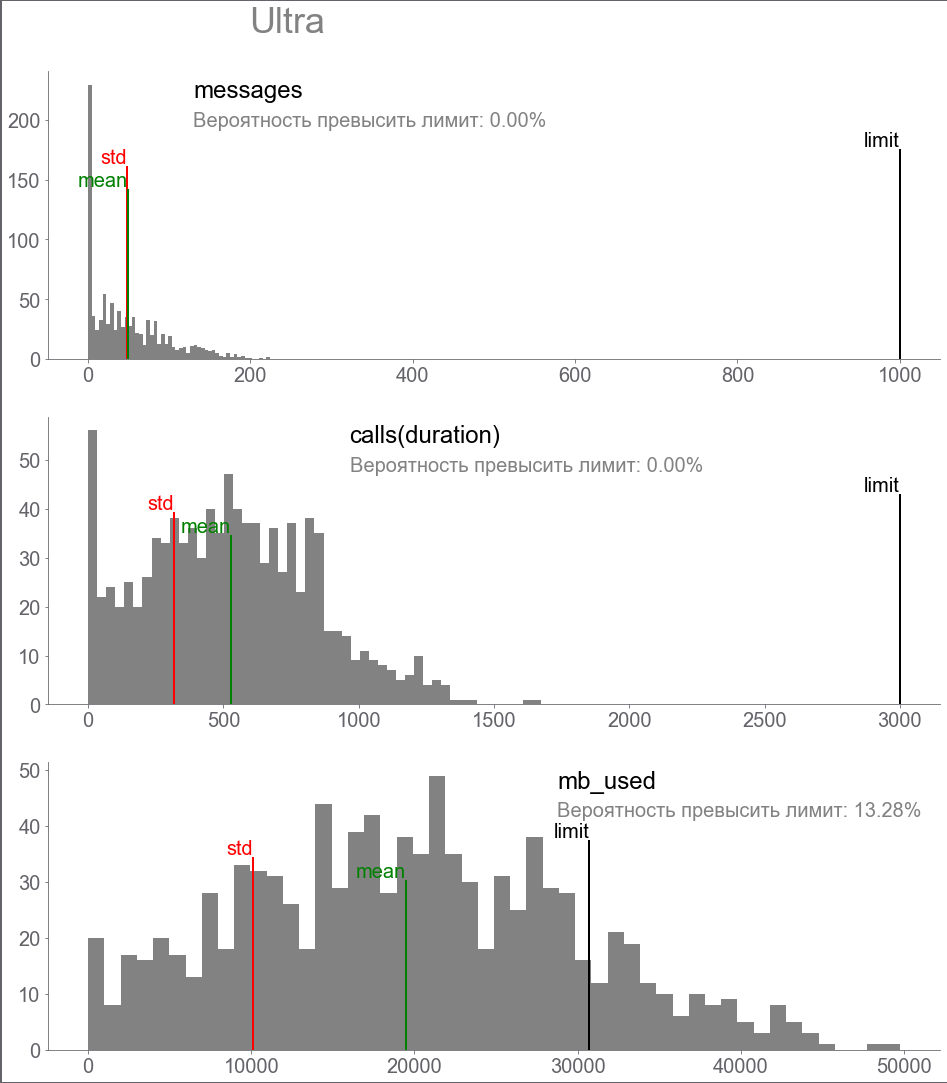

In [52]:
tar_limits_u = [1000, 3000, 30700]
tar_limits_s = [50, 500, 15300]
color_u = '#828282'
color_s = '#174A7E'
tariffs = ['ultra', 'smart']
tar_lists = ['messages','calls(duration)','mb_used', 'all_cost']
create_hist(df_all, tariffs[0], tar_lists, first_line_name, tar_limits_u, color_u)

### Вывод по пользователям тарифа Ultra
Графики показывают, что <b>вероятность того</b>, что пользователи <b>будут превышать лимиты</b> по показателям - <b>Крайне Мала</b>  

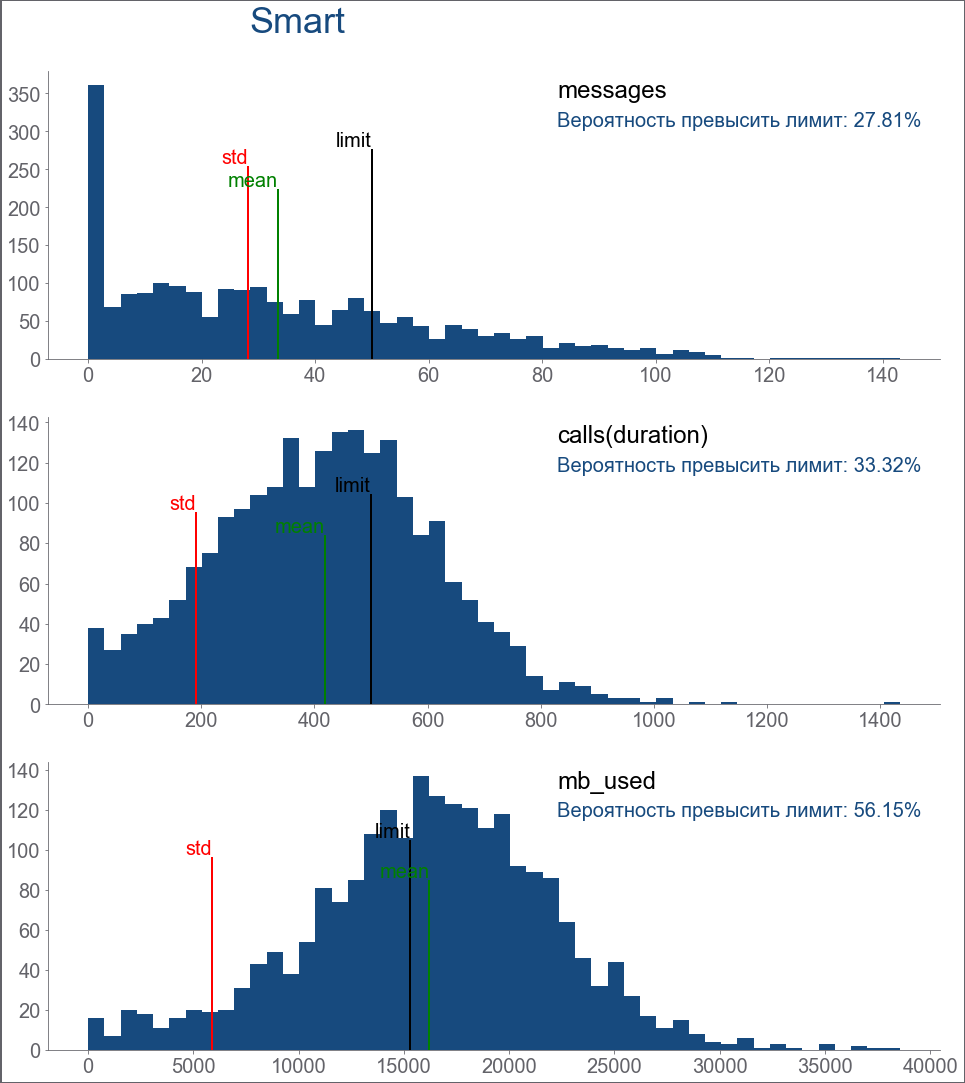

In [53]:
create_hist(df_all, tariffs[1], tar_lists, second_line_name, tar_limits_s, color_s)

### Вывод по пользователям тарифа Smart
Графики показывают вероятности превысить лимити пользователями.<br>
Можем предположить, что пользователи этого тарифа ежемесячно с <b>большой вероятностью приносят дополнительную прибыль</b>. 

### Гипотеза 1
У пользователей тарифа Smart гораздо меньше оплата за весь пакет за месяц, но графики показывают, что пользователи тарифа Smart, гораздо чаще выходят за лимиты опций и покупают дополнительные сообщения\минуты\интернет, из этого можем предположить, что выручка с тарифов Smart не так сильно отличается от выручки с тарифа Ultra, как кажется на первый взляд.<br>
Из этого выведем нулевую и альтернативную гипотезы.<br>
<br>Нулевая гипотеза - средние выручки с тарифов равны<br>
Альтернативная гипотеза - средние выручки различаются

In [54]:
alpha = .05
temp_u = 30700
temp_s = 15370
temp_base_u = df_all.loc[df_all['tariff'] == tariffs[0]][tar_lists[3]].astype(int)
temp_base_s = df_all.loc[df_all['tariff'] == tariffs[1]][tar_lists[3]].astype(int)
results_p = st.ttest_ind(temp_base_u, temp_base_s)
p_value = results_p.pvalue
print('p-value = {:.3%}'.format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 
    
# display(p_value)

p-value = 0.000%
Отвергаем нулевую гипотезу


### Вывод
Отвергаем гипотезу "средние выручки с тарифов равны"

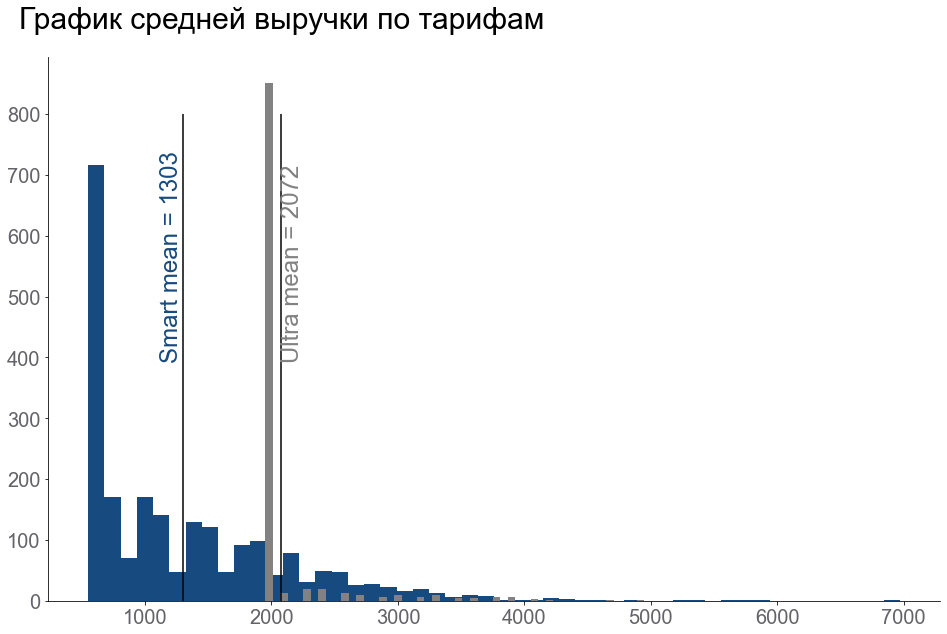

In [55]:
color_u = '#828282'
color_s = '#174A7E'
fig, axs = plt.subplots(figsize=(16,10))    
fig.text(0.1, 0.92,'График средней выручки по тарифам', fontsize=30)
axs.hist(temp_base_s, bins=50, color=color_s)
axs.hist(temp_base_u, bins=50, color=color_u)
axs.vlines(x=[temp_base_u.mean(), temp_base_s.mean()], ymin=0, ymax=800, colors='k')
axs.text(x=0, y=0, position=(temp_base_u.mean(), 400), s=f'Ultra mean = {int(temp_base_u.mean())}', fontsize=24, rotation='vertical', ha='left', color=color_u)
axs.text(x=0, y=0, position=(temp_base_s.mean(), 400), s=f'Smart mean = {int(temp_base_s.mean())}', fontsize=24, rotation='vertical', ha='right', color=color_s)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
for i in (axs.get_yticklabels() + axs.get_xticklabels()):
    i.set_fontsize(20)
    i.set_color('#636369')
plt.show()

### График подтверждает, что нулевую гипотезу нужно отвергнуть

### Гипотеза 2
Можно предположить, что на среднюю выручку будет влиять регион. 
<br>Попробуем сравнить Москву с остальными регионами.<br>
<br>Нулевая гипотеза - средняя выручка пользователей из Москвы такая же как в регионах<br>
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки в регионах

In [56]:
df_all_with_cities = df_all.merge(df_user, on='user_id')
temp_base_m = df_all_with_cities.loc[df_all_with_cities['city'] == 'Москва'][tar_lists[3]].astype(int)
temp_base_o = df_all_with_cities.loc[df_all_with_cities['city'] != 'Москва'][tar_lists[3]].astype(int)
results_p = st.ttest_ind(temp_base_m, temp_base_o)
p_value = results_p.pvalue
print('p-value = {:.3%}'.format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-value = 59.248%
Не отвергаем нулевую гипотезу


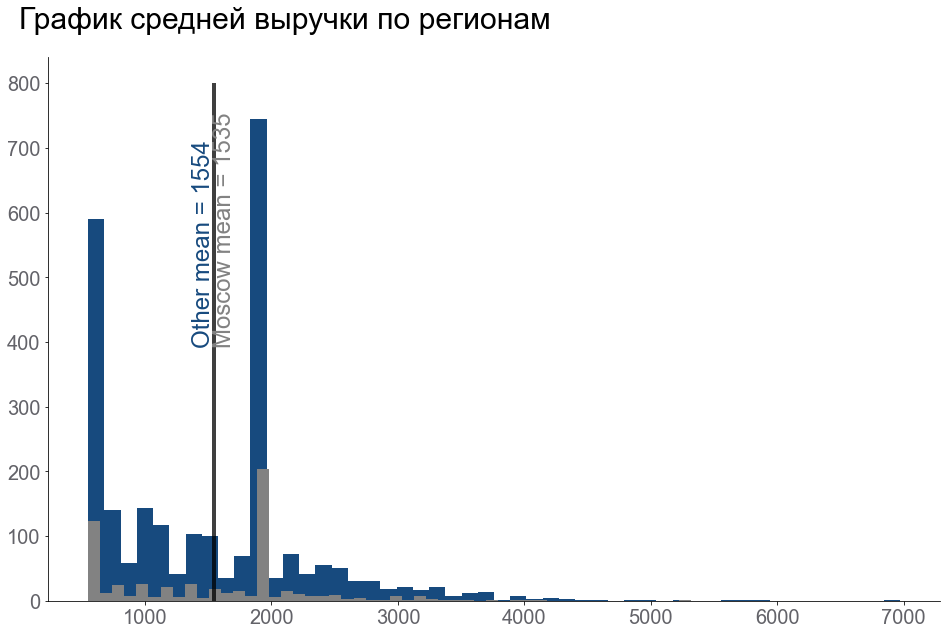

In [57]:
fig, axs = plt.subplots(figsize=(16,10))    
fig.text(0.1, 0.92,'График средней выручки по регионам', fontsize=30)
axs.hist(temp_base_o, bins=50, color=color_s)
axs.hist(temp_base_m, bins=50, color=color_u)
axs.vlines(x=[temp_base_o.mean(), temp_base_m.mean()], ymin=0, ymax=800, colors='k')
axs.text(x=0, y=0, position=(temp_base_o.mean(), 400), s=f'Moscow mean = {int(temp_base_o.mean())}', fontsize=24, rotation='vertical', ha='left', color=color_u)
axs.text(x=0, y=0, position=(temp_base_m.mean(), 400), s=f'Other mean = {int(temp_base_m.mean())}', fontsize=24, rotation='vertical', ha='right', color=color_s)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
for i in (axs.get_yticklabels() + axs.get_xticklabels()):
    i.set_fontsize(20)
    i.set_color('#636369')
plt.show()

### График подтверждает, что нулевую гипотезу не стоит отвергать

# Общий вывод

Данные указывают на то, что на 2018 год, тариф Ultra в среднем приносит больше прибыли, чем тариф Smart.<br>

<br>Однако, нам <i>неизвестно, платит ли оператор за неиспользованные сообщения\минуты\трафик</i>.<br>
Это очень важный аспект, без которого сложно считать какой тариф действительно выгоднее рекламировать.<br>
Также, нужно понимать насколько дороже приобретенная опция за пределами лимита затрат оператора на эту опцию.<br>

<br>Можно было заметить, что за год, средняя выручка с тарифа <b>Smart - выросла на 119.35%</b>, в то время<br>
как с тарифа <b>Ultra - выросла на 9.85%</b>, что означает, что <b>выручка с тарифа Smart растёт в 12.17 раз <br>
быстрее</b> по отношению к Ultra. Если рост сохраниться и на следующий год, то к концу следующего года, <br>
<b>средняя выручка с тарифа Smart вырастит до 3509</b>, в то время как у Ultra будет равняться 2356.<br>

<br>Промежуточные выводы:<br>
1) Нужно узнать <b>сколько стоит одна единица каждого пакета для компании</b> и провести аналогичное исследование, <br>
но учитывая расходы компании.<br>
2) Если средний рост выручки сохраниться на следующий год, то уже к <b>марту-маю средняя выручка с тарифов<br>
Smart догонит тариф Ultra</b>.<br>

<br>Общий вывод:<br>
<b>Нужно определить благодаря каким условиям выручка с тарифов Smart так стремительно растёт.</b><br>
Если найдём подтверждение что рост сохраниться или достигнет потолка выше значений тарифа Ultra, <br>
то <b>корректировать рекламный бюджет</b> нужно в сторону тарифа <b>Smart</b>.